In [56]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as sp

In [67]:
training_data = pd.read_csv('./training_matrix.binary.csv', index_col=0).transpose()
testing_data = pd.read_csv('./testing_matrix.binary.csv', index_col=0).transpose()

In [68]:
testing_data.head()

,GTA[TC]GG[GA]TG,TTTTTTTTC,ATGT[AG]TGGG,TT[TC]TTTTTT,[TG]C[CG]GCCT[AG][GC],ATC[CT]GTACA,TTTTTC[AC]A,CCCGGCCC,GGCCCTGGC,[TC][CG][GC]CGCGTC
RPL11A,1,1,0,1,0,0,0,0,0,0
RPL12B,0,0,0,0,0,0,0,0,0,0
RPL21A,0,0,0,0,0,0,0,0,0,0
RPL21B,0,0,0,0,0,0,0,0,0,0
RPL26A,0,1,1,1,0,1,0,0,0,0


In [69]:
training_output = [x.strip().split('\t')[1] for x in open('./DREAM6_ExPred_PromoterActivities.txt').readlines()]
testing_output = [x.strip().split('\t')[1] for x in open('./dream6_expred_predictions_gold_standard_0.txt').readlines()[1:]]

In [70]:
#Binary features
clf = linear_model.LinearRegression()
clf.fit(np.array(training_data), np.array(training_output).astype(np.float))
#Score on training data
print clf.score(training_data, np.array(training_output).astype(np.float))
predicted_output = clf.predict(training_data)
print sp.spearmanr(training_output, predicted_output)
#Score on testing data
print clf.score(testing_data, np.array(testing_output).astype(np.float))
predicted_output = clf.predict(testing_data)
sp.spearmanr(testing_output, predicted_output)

0.127089469116
(0.33758491663008705, 0.0011382162322665409)
0.0840954203644


(0.25005359724305215, 0.070947039547954435)

In [66]:
#Numerical features
clf = linear_model.LinearRegression()
clf.fit(np.array(training_data), np.array(training_output).astype(np.float))
#Score on training data
print clf.score(training_data, np.array(training_output).astype(np.float))
predicted_output = clf.predict(training_data)
print sp.spearmanr(training_output, predicted_output)
#Score on testing data
print clf.score(testing_data, np.array(testing_output).astype(np.float))
predicted_output = clf.predict(testing_data)
sp.spearmanr(testing_output, predicted_output)

0.137058455865
(0.2926856384989539, 0.0051193204914292733)
0.0523193154035


(0.24185795982278877, 0.081024333802745693)

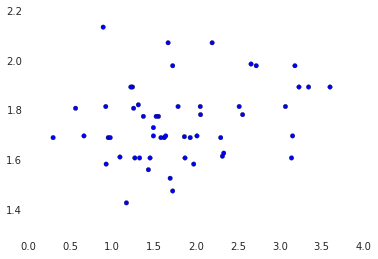

In [60]:
plt.scatter(testing_output, predicted_output)

In [54]:
clf = linear_model.Lasso(alpha = 0.0001)
clf.fit(np.array(training_data), np.array(training_output).astype(np.float))
print clf.score(testing_data, np.array(testing_output).astype(np.float))
predicted_output = clf.predict(testing_data)
sp.spearmanr(testing_output, predicted_output)[1]

0.0523040113906


0.081024333802745693